# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés. Sacar la fecha.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida. Sacar la fecha.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas. Sacarlo a partir de todas las columnas. Reviews per month, 0
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [197]:
# Resolver acá

import pandas as pd

# cargo archivo CSV en un df
df_airbnb_ny_crudo = pd.read_csv('Base Airbnb NY.csv')
df_airbnb_ny_crudo


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48900,19454344,Perfect ap in Manhattan! Walking to Central Park!,11670284,Val,Manhattan,Upper East Side,40.76811,-73.95194,Entire home/apt,150.0,3,10,2019-05-02,0.54,2,89
48901,36224876,Upper East Side Apt By The Water,46232598,Caitlin,Manhattan,Upper East Side,40.77001,-73.94915,Entire home/apt,150.0,1,1,2019-07-01,1.00,1,130
48902,21869051,Comfy Apt in NYC Brownstone,97243693,Joyce,Manhattan,Murray Hill,40.74812,-73.97663,Entire home/apt,150.0,3,57,2019-07-01,3.07,2,49
48903,3004563,The spot,15303460,Emma,Brooklyn,Prospect-Lefferts Gardens,40.65595,-73.95412,Private room,50.0,7,1,2019-06-08,0.94,1,125


In [199]:
# Chequeo cuantos datos hay duplicados

datos_dup = df_airbnb_ny_crudo.duplicated().sum()

print("Número de datos duplicados:",datos_dup)

# Los saco de mi df

df_airbnb_ny_nodup = df_airbnb_ny_crudo.drop_duplicates()
df_airbnb_ny_nodup

Número de datos duplicados: 10


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,NaN,6,2


In [201]:
# Saco las columnas irrelevantes, id, hostname, latitude y longitude
df_airbnb_ny_nodup_clean = df_airbnb_ny_nodup.drop(columns=['host_id', 'host_name','last_review','reviews_per_month'])
df_airbnb_ny_nodup_clean

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2


In [203]:
# Elimino los missing values de acuerdo al Listwise Deletion

df_airbnb_ny_nodup_clean_full = df_airbnb_ny_nodup_clean.dropna()
df_airbnb_ny_nodup_clean_full

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2


In [205]:
#Si hay observaciones con outliers o valores que no tienen sentido, tomen una decision. 
#Expliquen las decisiones tomadas. Sacarlo a partir de todas las columnas. 

In [207]:
import numpy as np

# Aplicamos logaritmo a las variables seleccionadas
df_airbnb_ny_nodup_clean_full['log_minimum_nights'] = np.log(df_airbnb_ny_nodup_clean_full['minimum_nights'] + 1)
df_airbnb_ny_nodup_clean_full['log_price'] = np.log(df_airbnb_ny_nodup_clean_full['price'] + 1)
df_airbnb_ny_nodup_clean_full['log_number_of_reviews'] = np.log(df_airbnb_ny_nodup_clean_full['number_of_reviews'] + 1)
df_airbnb_ny_nodup_clean_full['log_calculated_host_listings_count'] = np.log(df_airbnb_ny_nodup_clean_full['calculated_host_listings_count'] + 1)
df_airbnb_ny_nodup_clean_full['log_availability_365'] = np.log(df_airbnb_ny_nodup_clean_full['availability_365'] + 1)
df_airbnb_ny_nodup_clean_full

/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn/T/ipykernel_68990/1817524695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_ny_nodup_clean_full['log_minimum_nights'] = np.log(df_airbnb_ny_nodup_clean_full['minimum_nights'] + 1)
/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn/T/ipykernel_68990/1817524695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_ny_nodup_clean_full['log_price'] = np.log(df_airbnb_ny_nodup_clean_full['price'] + 1)
/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,6,365,0.693147,5.010635,2.302585,1.945910,5.902633
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2,355,0.693147,5.420535,3.828641,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,1,365,1.386294,5.017280,0.000000,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,1,194,0.693147,4.499810,5.602119,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,1,0,2.397895,4.394449,2.302585,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,2,9,1.098612,4.262680,0.000000,1.098612,2.302585
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,2,36,1.609438,3.713572,0.000000,1.098612,3.610918
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,1,27,2.397895,4.753590,0.000000,0.693147,3.332205
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,6,2,0.693147,4.025352,0.000000,1.945910,1.098612


In [209]:
df_airbnb_ny_log = df_airbnb_ny_nodup_clean_full.drop(columns=['minimum_nights', 'price','number_of_reviews','calculated_host_listings_count','availability_365'])
df_airbnb_ny_log

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612


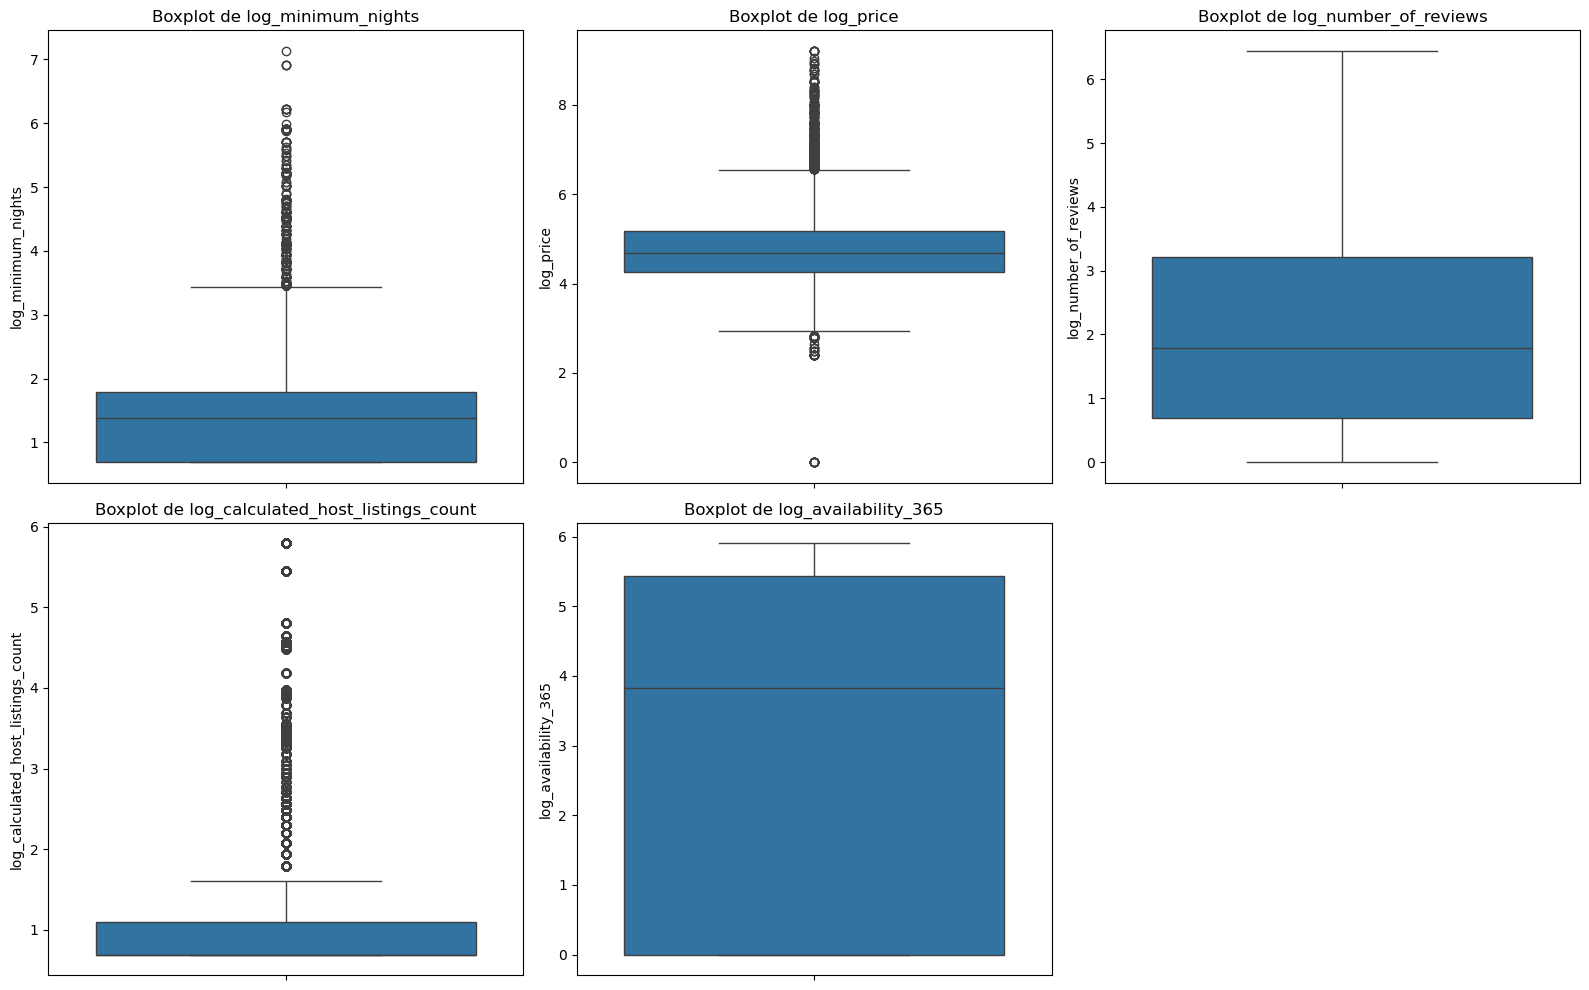

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para visualizar los boxplots de cada columna
plt.figure(figsize=(16, 10))  # Ajustar el tamaño de la figura
for i, col in enumerate(columnas, 1):
    plt.subplot(2, 3, i)  # Crear una cuadrícula de 2 filas y 3 columnas
    sns.boxplot(data=df_airbnb_ny_log[col])
    plt.title(f'Boxplot de {col}')  # Título del gráfico

plt.tight_layout()  # Ajustar el layout para que no se superpongan los gráficos
plt.show()


In [215]:
# Filtrar con IQR

columnas = ['log_minimum_nights', 'log_price','log_number_of_reviews','log_calculated_host_listings_count','log_availability_365']


# Calcular Q1 (percentil 25) y Q3 (percentil 75) para cada columna numérica
Q1 = df_airbnb_ny_log[columnas].quantile(0.25)
Q3 = df_airbnb_ny_log[columnas].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Filtrar datos que estén dentro del rango de valores aceptables (no outliers)
df_airbnb_ny_no_outliers = df_airbnb_ny_log[~((df_airbnb_ny_log[columnas] < (Q1 - 2.5 * IQR)) | (df_airbnb_ny_log[columnas] > (Q3 + 2.5 * IQR))).any(axis=1)]

# Mostrar las primeras filas del DataFrame sin outliers
df_airbnb_ny_no_outliers


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612


In [230]:
### Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.

valores_unicos_ng = df_airbnb_ny_no_outliers['neighbourhood_group'].unique()
valores_unicos_rt = df_airbnb_ny_no_outliers['room_type'].unique()
# Mostrar los valores únicos
print(valores_unicos_ng)
print(valores_unicos_rt)

['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
['Private room' 'Entire home/apt' 'Shared room']


In [238]:
# Importamos LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Creamos un objeto de LabelEncoder
label_encoder = LabelEncoder()

# Aplicamos la codificación a la columna categórica, por ejemplo, 'neighbourhood'
df_airbnb_ny_no_outliers['neighbourhood_encoded'] = label_encoder.fit_transform(df_airbnb_ny_no_outliers['neighbourhood_group'])
df_airbnb_ny_no_outliers['room_encoded'] = label_encoder.fit_transform(df_airbnb_ny_no_outliers['room_type'])

# Ver los primeros valores transformados
# print(df_airbnb_ny_no_outliers[['neighbourhood_group', 'neighbourhood_encoded']].head())
# print(df_airbnb_ny_no_outliers[['room_type', 'room_encoded']].head())

df_airbnb_ny_no_outliers

/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn/T/ipykernel_68990/2163266938.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_ny_no_outliers['neighbourhood_encoded'] = label_encoder.fit_transform(df_airbnb_ny_no_outliers['neighbourhood_group'])
/var/folders/c8/3fzwh9y95v7fpczww9knjw5m0000gn/T/ipykernel_68990/2163266938.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airbnb_ny_no_outliers['room_encoded'] = label_encoder.fit_transform(df_airbnb_ny_no_outliers['room_type'])


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365,neighbourhood_encoded,room_encoded
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633,1,1
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931,2,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633,2,1
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000,1,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585,1,1
48891,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918,1,1
48892,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205,2,0
48893,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612,2,2


In [243]:
#Con la ayuda de los comandos groupby y join o merge, 
#Creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. 
#Llamen a esa nueva columna offer group


# Agrupar por 'neighbourhood_group' y contar la cantidad de oferentes en cada grupo
oferentes_por_grupos = df_airbnb_ny_no_outliers.groupby('neighbourhood_group').size().reset_index(name='oferentes_por_grupo')

# Unir el conteo al DataFrame original utilizando merge
df_airbnb_ny_limpio = df_airbnb_ny_no_outliers.merge(oferentes_por_grupos, on='neighbourhood_group', how='left')

# Verificar las primeras filas para ver el resultado
#print(df_airbnb_ny_no_outliers[['neighbourhood_group', 'oferentes_por_grupo']].head())
df_airbnb_ny_limpio

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,log_minimum_nights,log_price,log_number_of_reviews,log_calculated_host_listings_count,log_availability_365,neighbourhood_encoded,room_encoded,oferentes_por_grupo_x,oferentes_por_grupo_y
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,0.693147,5.010635,2.302585,1.945910,5.902633,1,1,19260,19260
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,0.693147,5.420535,3.828641,1.098612,5.874931,2,0,18853,18853
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,1.386294,5.017280,0.000000,0.693147,5.902633,2,1,18853,18853
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,0.693147,4.499810,5.602119,0.693147,5.273000,1,0,19260,19260
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,2.397895,4.394449,2.302585,0.693147,0.000000,2,0,18853,18853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44759,36484665,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,1.098612,4.262680,0.000000,1.098612,2.302585,1,1,19260,19260
44760,36485057,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,1.609438,3.713572,0.000000,1.098612,3.610918,1,1,19260,19260
44761,36485431,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,2.397895,4.753590,0.000000,0.693147,3.332205,2,0,18853,18853
44762,36485609,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,0.693147,4.025352,0.000000,1.945910,1.098612,2,2,18853,18853


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [ ]:
# Resolver acá


#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [ ]:
# Resolver acá


#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

In [ ]:
# Resolver acá


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [1]:
# Resolver acá


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [1]:
# Resolver acá


### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
# Resolver acá
